In [4]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/MSc_project/.MAIN

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/MSc_project/.MAIN


In [5]:
import pandas as pd 
import pickle
import json
import os
import os.path
import numpy as np
import seaborn as sns
from collections import defaultdict
import joblib
import matplotlib.pyplot as plt
from matplotlib.ticker import (
                               FormatStrFormatter, 
                               AutoMinorLocator,
                               FuncFormatter,
                               )
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
%matplotlib inline
from scipy.spatial import distance
import math


import os
# os.chdir('G:\My Drive\MSc_project\.MAIN')


# Distribution of best informer TWEET FEATURES

In [ ]:
all_df = pd.read_csv('multisource_analysis/score_db/best_tweets_scores.csv')

In [ ]:
cols = all_df.columns.tolist()
cols.remove('Unnamed: 0')
cols.remove('label')

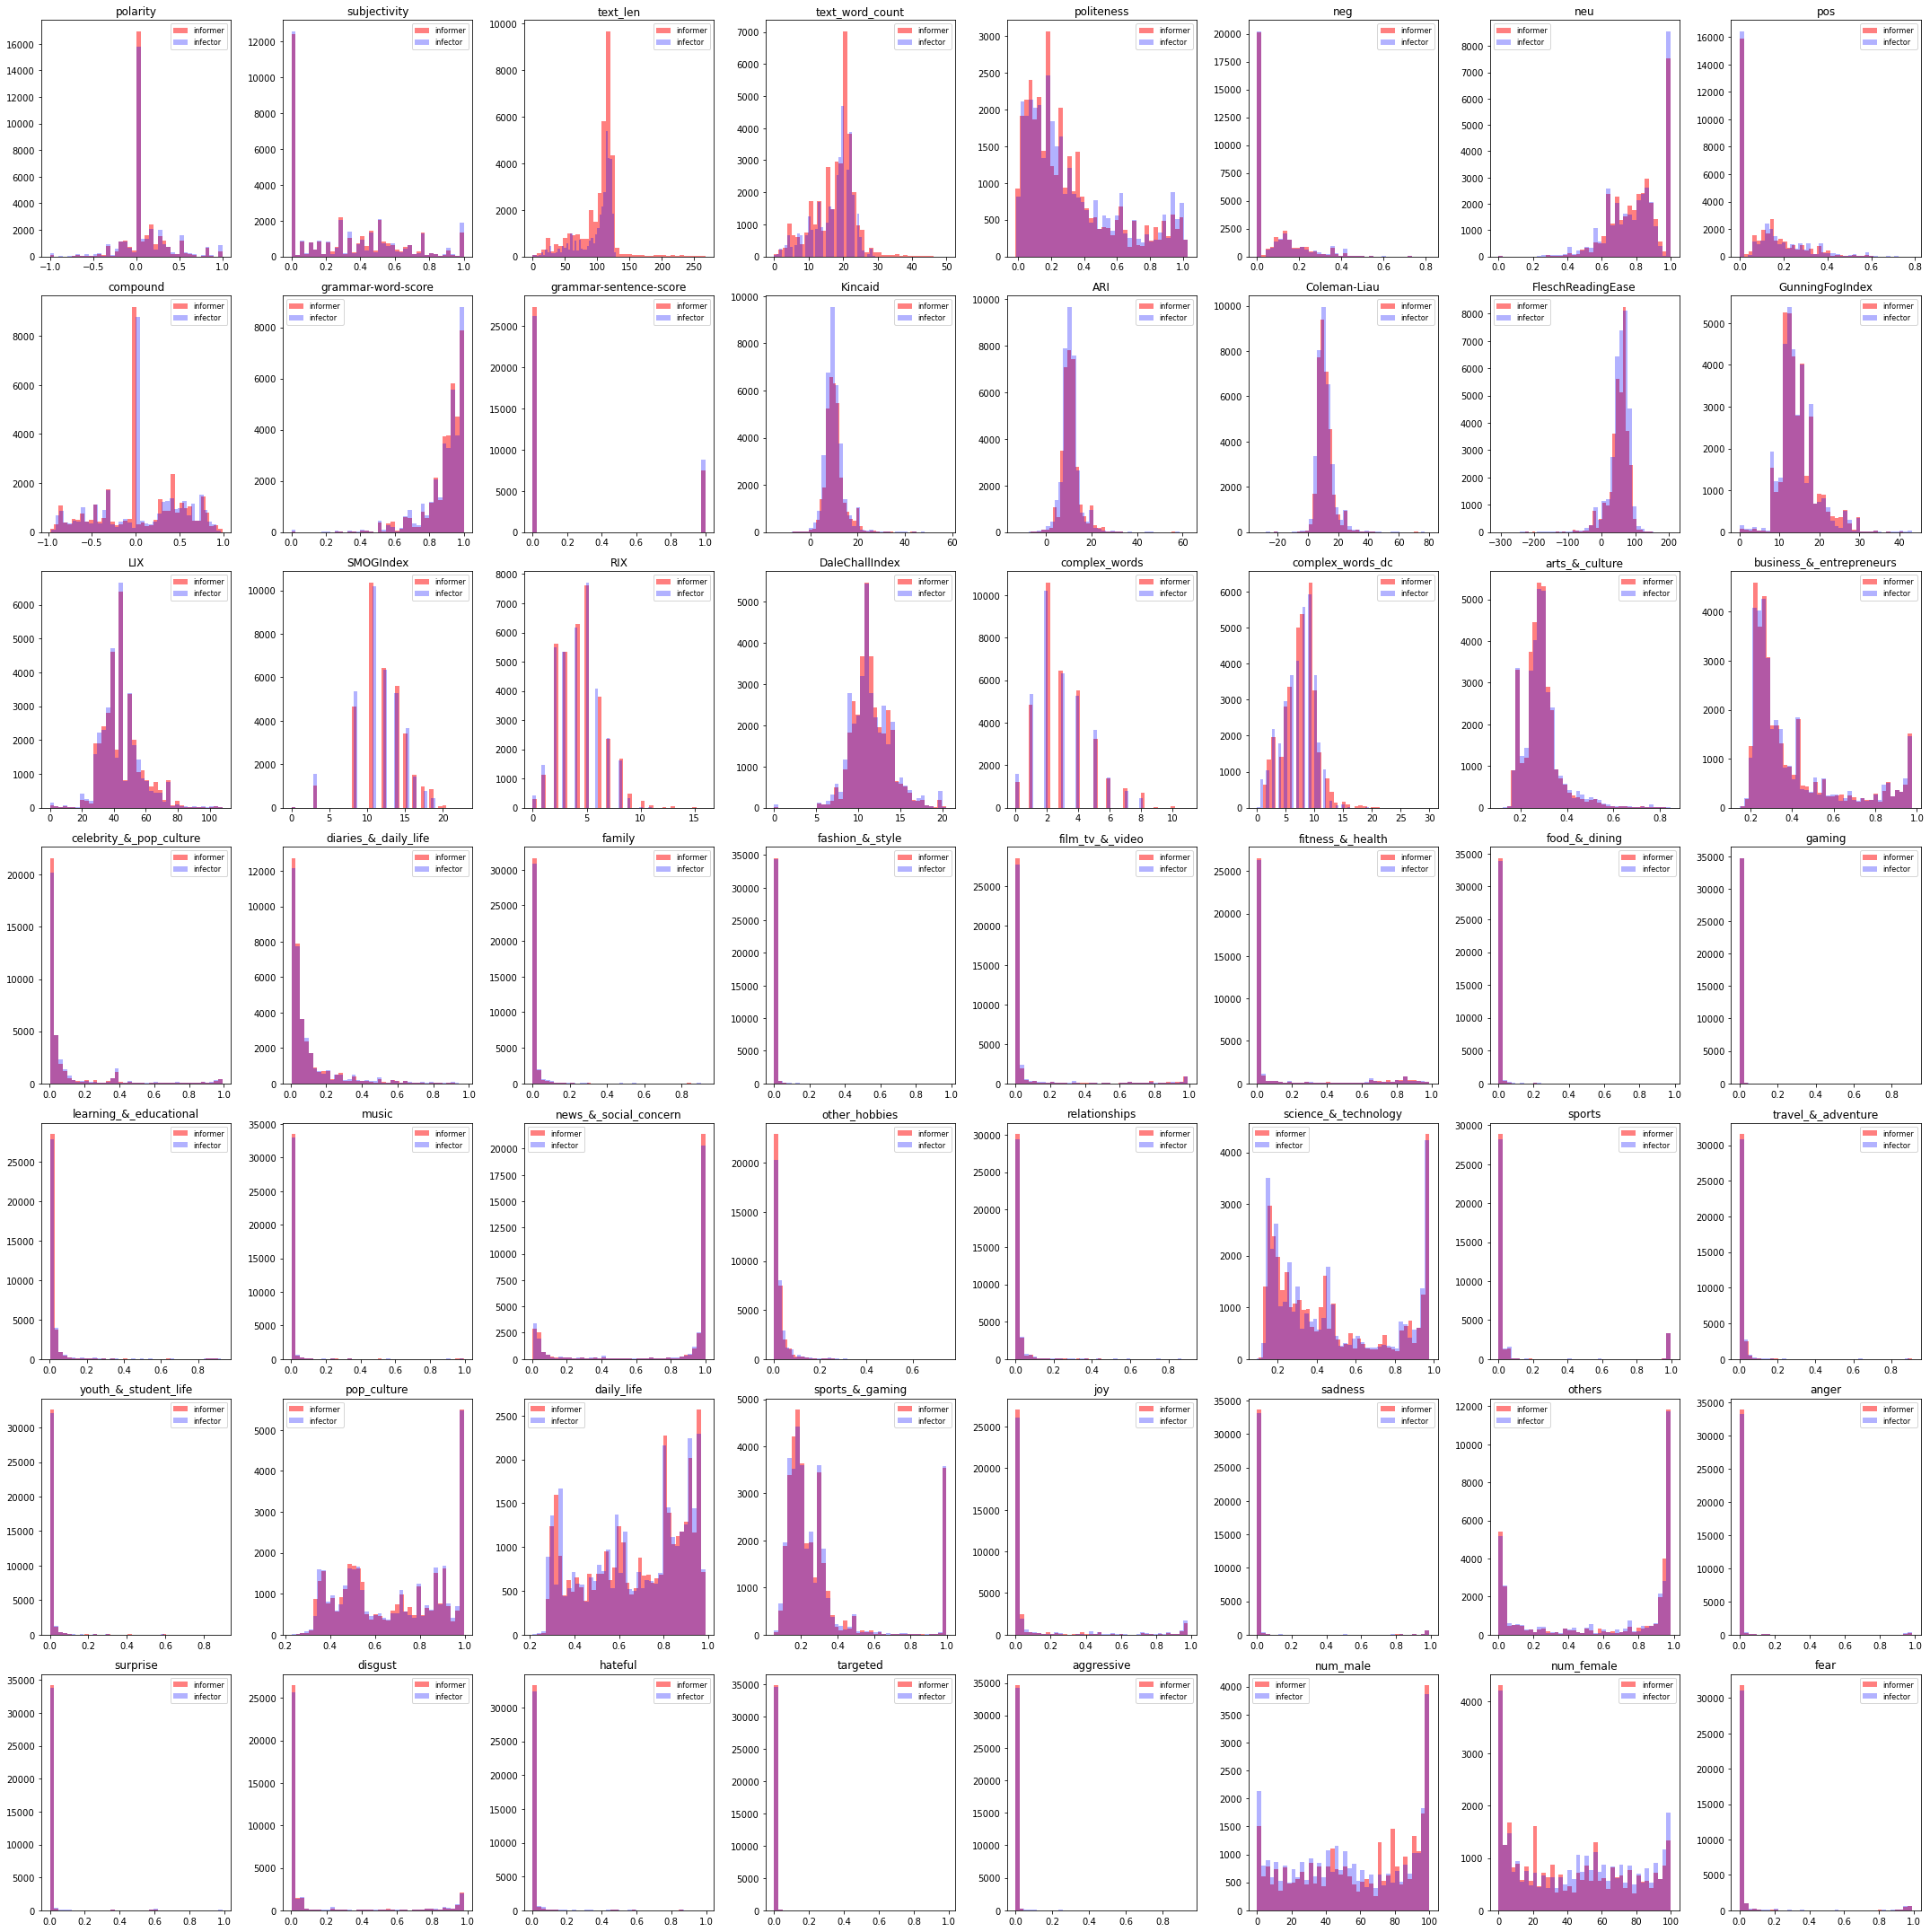

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fig, axes = plt.subplots(7,8, figsize=(30, 30))


informer = all_df[all_df['label']==0]
infector = all_df[all_df['label']==1]



ax = axes.ravel()                     # flatten the 2D array

for i, col in enumerate(cols):                   # for each of the 30 features
    bins = 40
    #---plot histogram for each feature---
    ax[i].hist(informer[col], bins=bins, color='r', alpha=.5)
    ax[i].hist(infector[col], bins=bins, color='b', alpha=0.3)
    #---set the title---
    ax[i].set_title(col, fontsize=12)    
    #---display the legend---
    ax[i].legend(['informer','infector'], loc='best', fontsize=8)
    
plt.tight_layout()
plt.show()

In [ ]:
fig.savefig(f'multisource_analysis/feature_anal/scores_breakdown.png', bbox_inches='tight', pad_inches = 0, facecolor='w')

In [ ]:
all_df.to_csv('multisource_analysis/score_db/tweet_breakdown.csv')

In [ ]:
df_corr = all_df.corr()['label'].abs().sort_values(ascending=False)
df_corr

label                       1.000000
num_male                    0.067118
num_female                  0.064558
SMOGIndex                   0.060196
other_hobbies               0.045987
text_len                    0.045535
grammar-sentence-score      0.044265
hateful                     0.043948
joy                         0.043537
relationships               0.041687
family                      0.041651
anger                       0.041168
politeness                  0.039168
pos                         0.035957
diaries_&_daily_life        0.035583
RIX                         0.032714
neg                         0.032568
aggressive                  0.032110
complex_words               0.030636
Kincaid                     0.029807
ARI                         0.029440
LIX                         0.029321
learning_&_educational      0.029010
travel_&_adventure          0.028587
arts_&_culture              0.027452
food_&_dining               0.027142
GunningFogIndex             0.027033
g

### remove colinearity

In [ ]:
from sklearn.linear_model import LinearRegression

all_df[cols] = all_df.copy()[cols].astype(float)

def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        print(feature)
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

cols = all_df.columns.to_list()
cols.remove('label')

df = all_df.copy()[ all_df[cols].notna() ]
df.drop('label', axis=1, inplace=True)
df.dropna()
df.dropna(axis=0)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna()
df.dropna(axis=0)


calculate_vif(df,cols)

### performing the pca

In [ ]:
from sklearn.preprocessing import StandardScaler
# get the features and label from the original dataframe
X = all_df[cols]
y = all_df['label']
# performing standardization
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

from sklearn.decomposition import PCA

components = None

pca = PCA(n_components = components)
# perform PCA on the scaled data
pca.fit(X_scaled)

# USER FEATURES

### user cols

### run

In [ ]:
# all_udf.to_csv('multisource_analysis/score_db/best_informer_user_breakdown.csv')
all_udf = pd.read_csv('multisource_analysis/score_db/ALL_BEST_FEATURES.csv')
cols = all_udf.columns.to_list()
[ cols.remove(x) for x in ['Unnamed: 0']]
[ cols.remove(x) for x in ['is-infector','is-informer','is-target', 'hashtag']]
[ cols.remove(x) for x in cols if 'count' in x ]
cols = [ x for x in cols if 'user' in x]

## hashtag breakdown

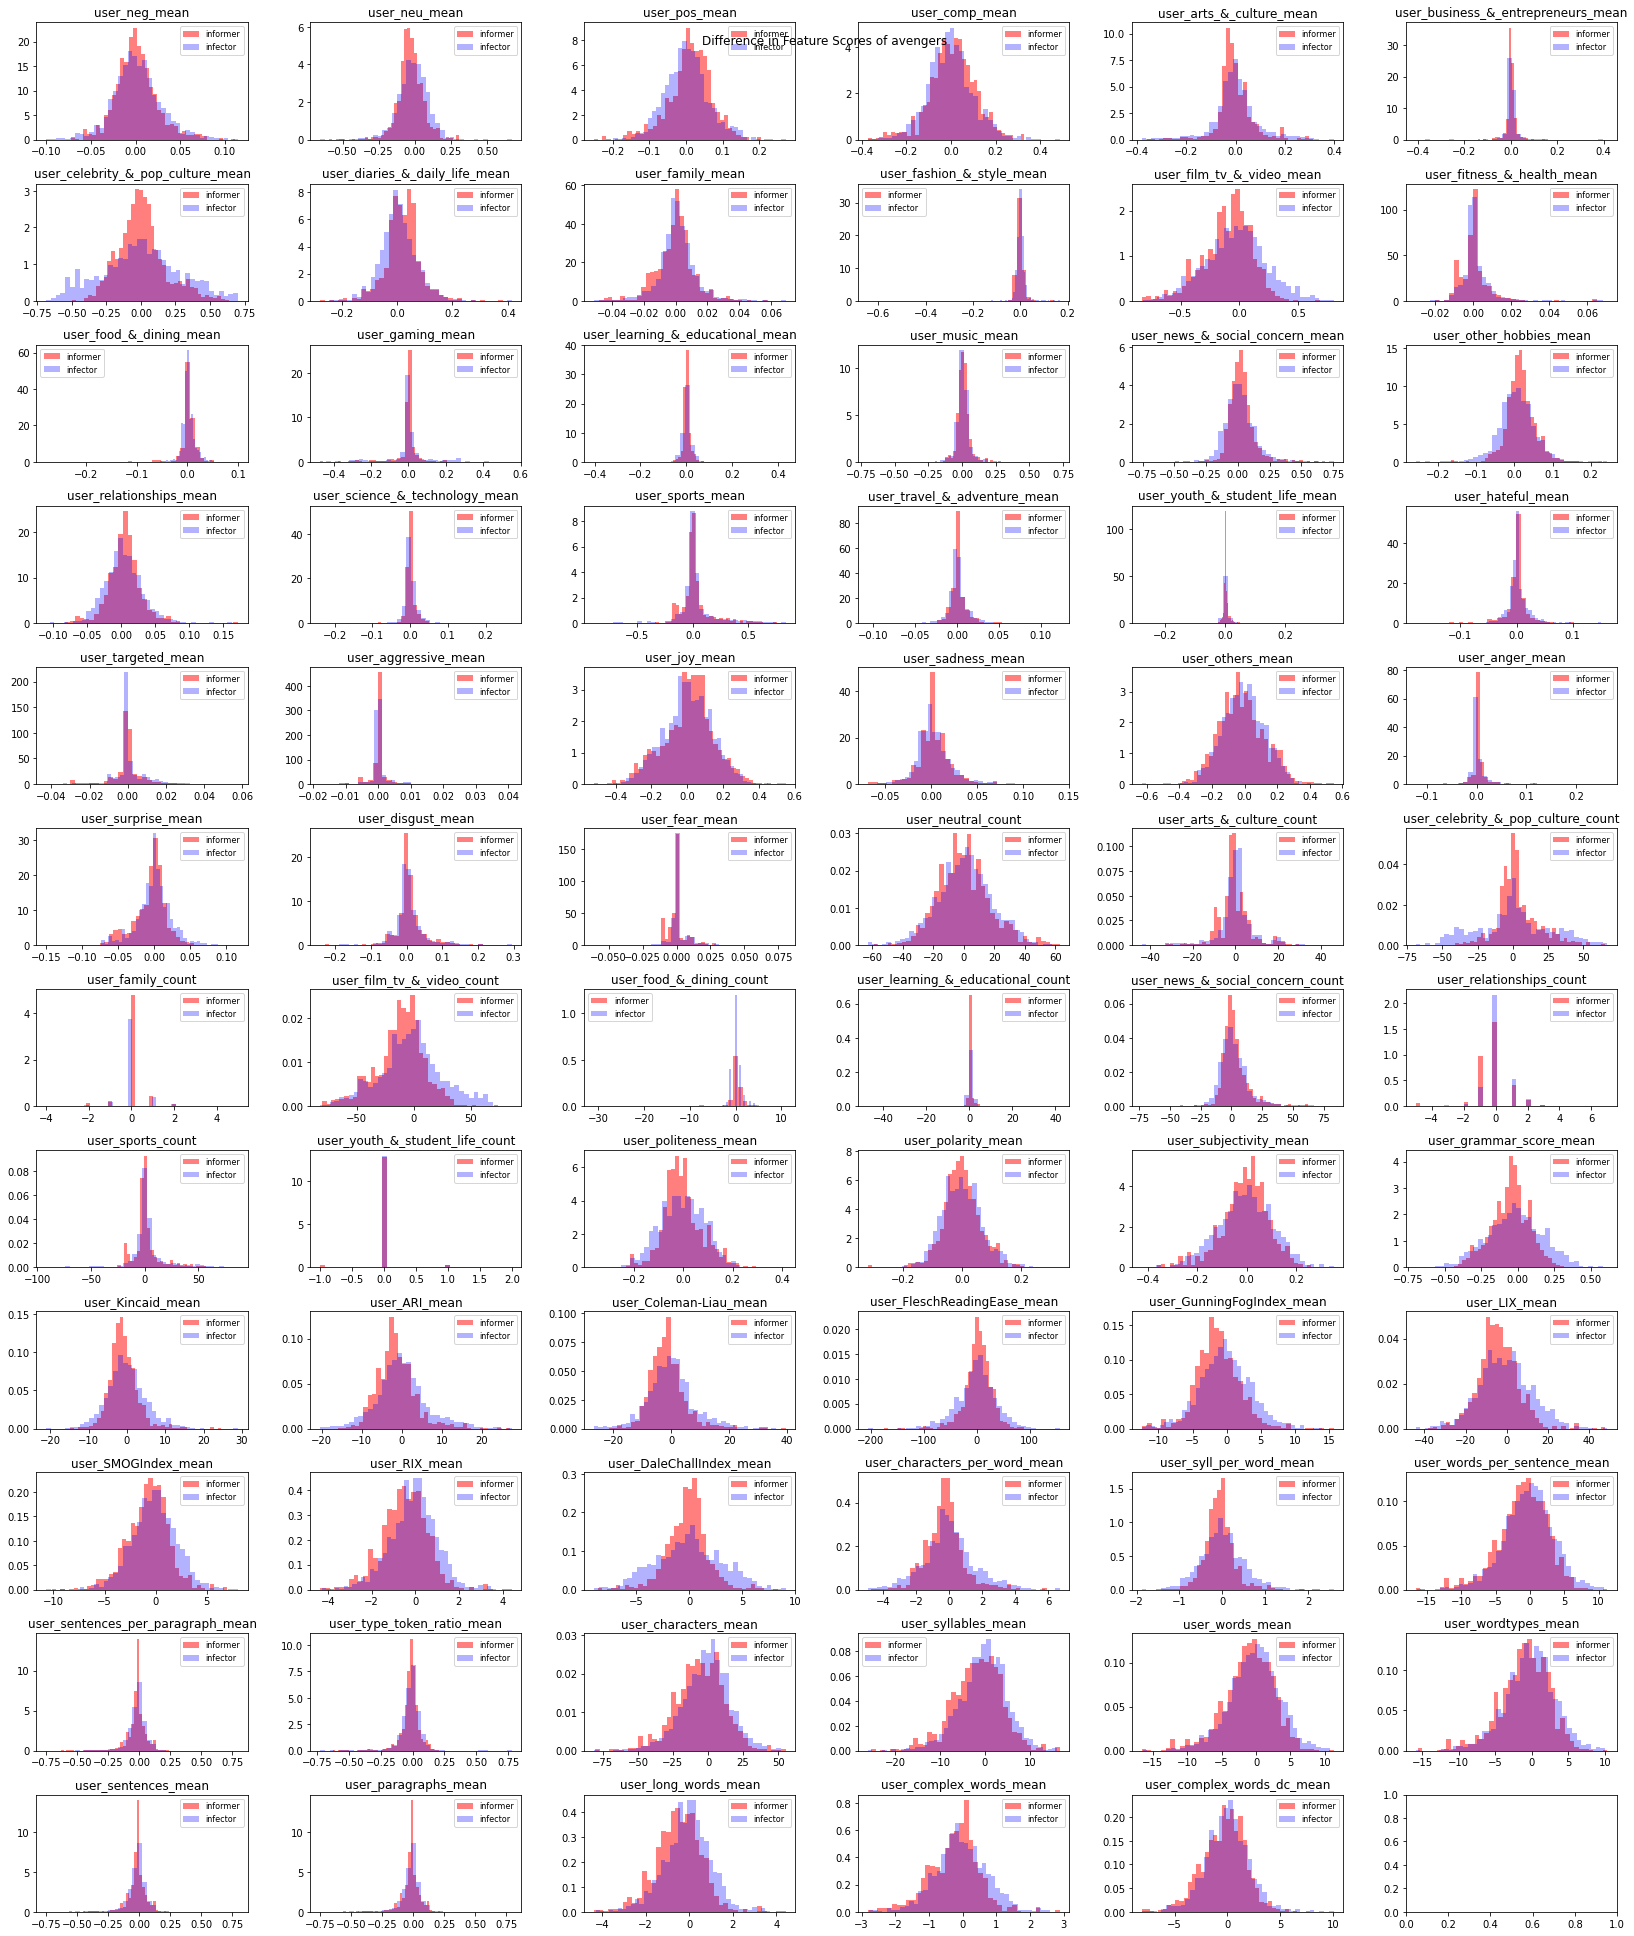

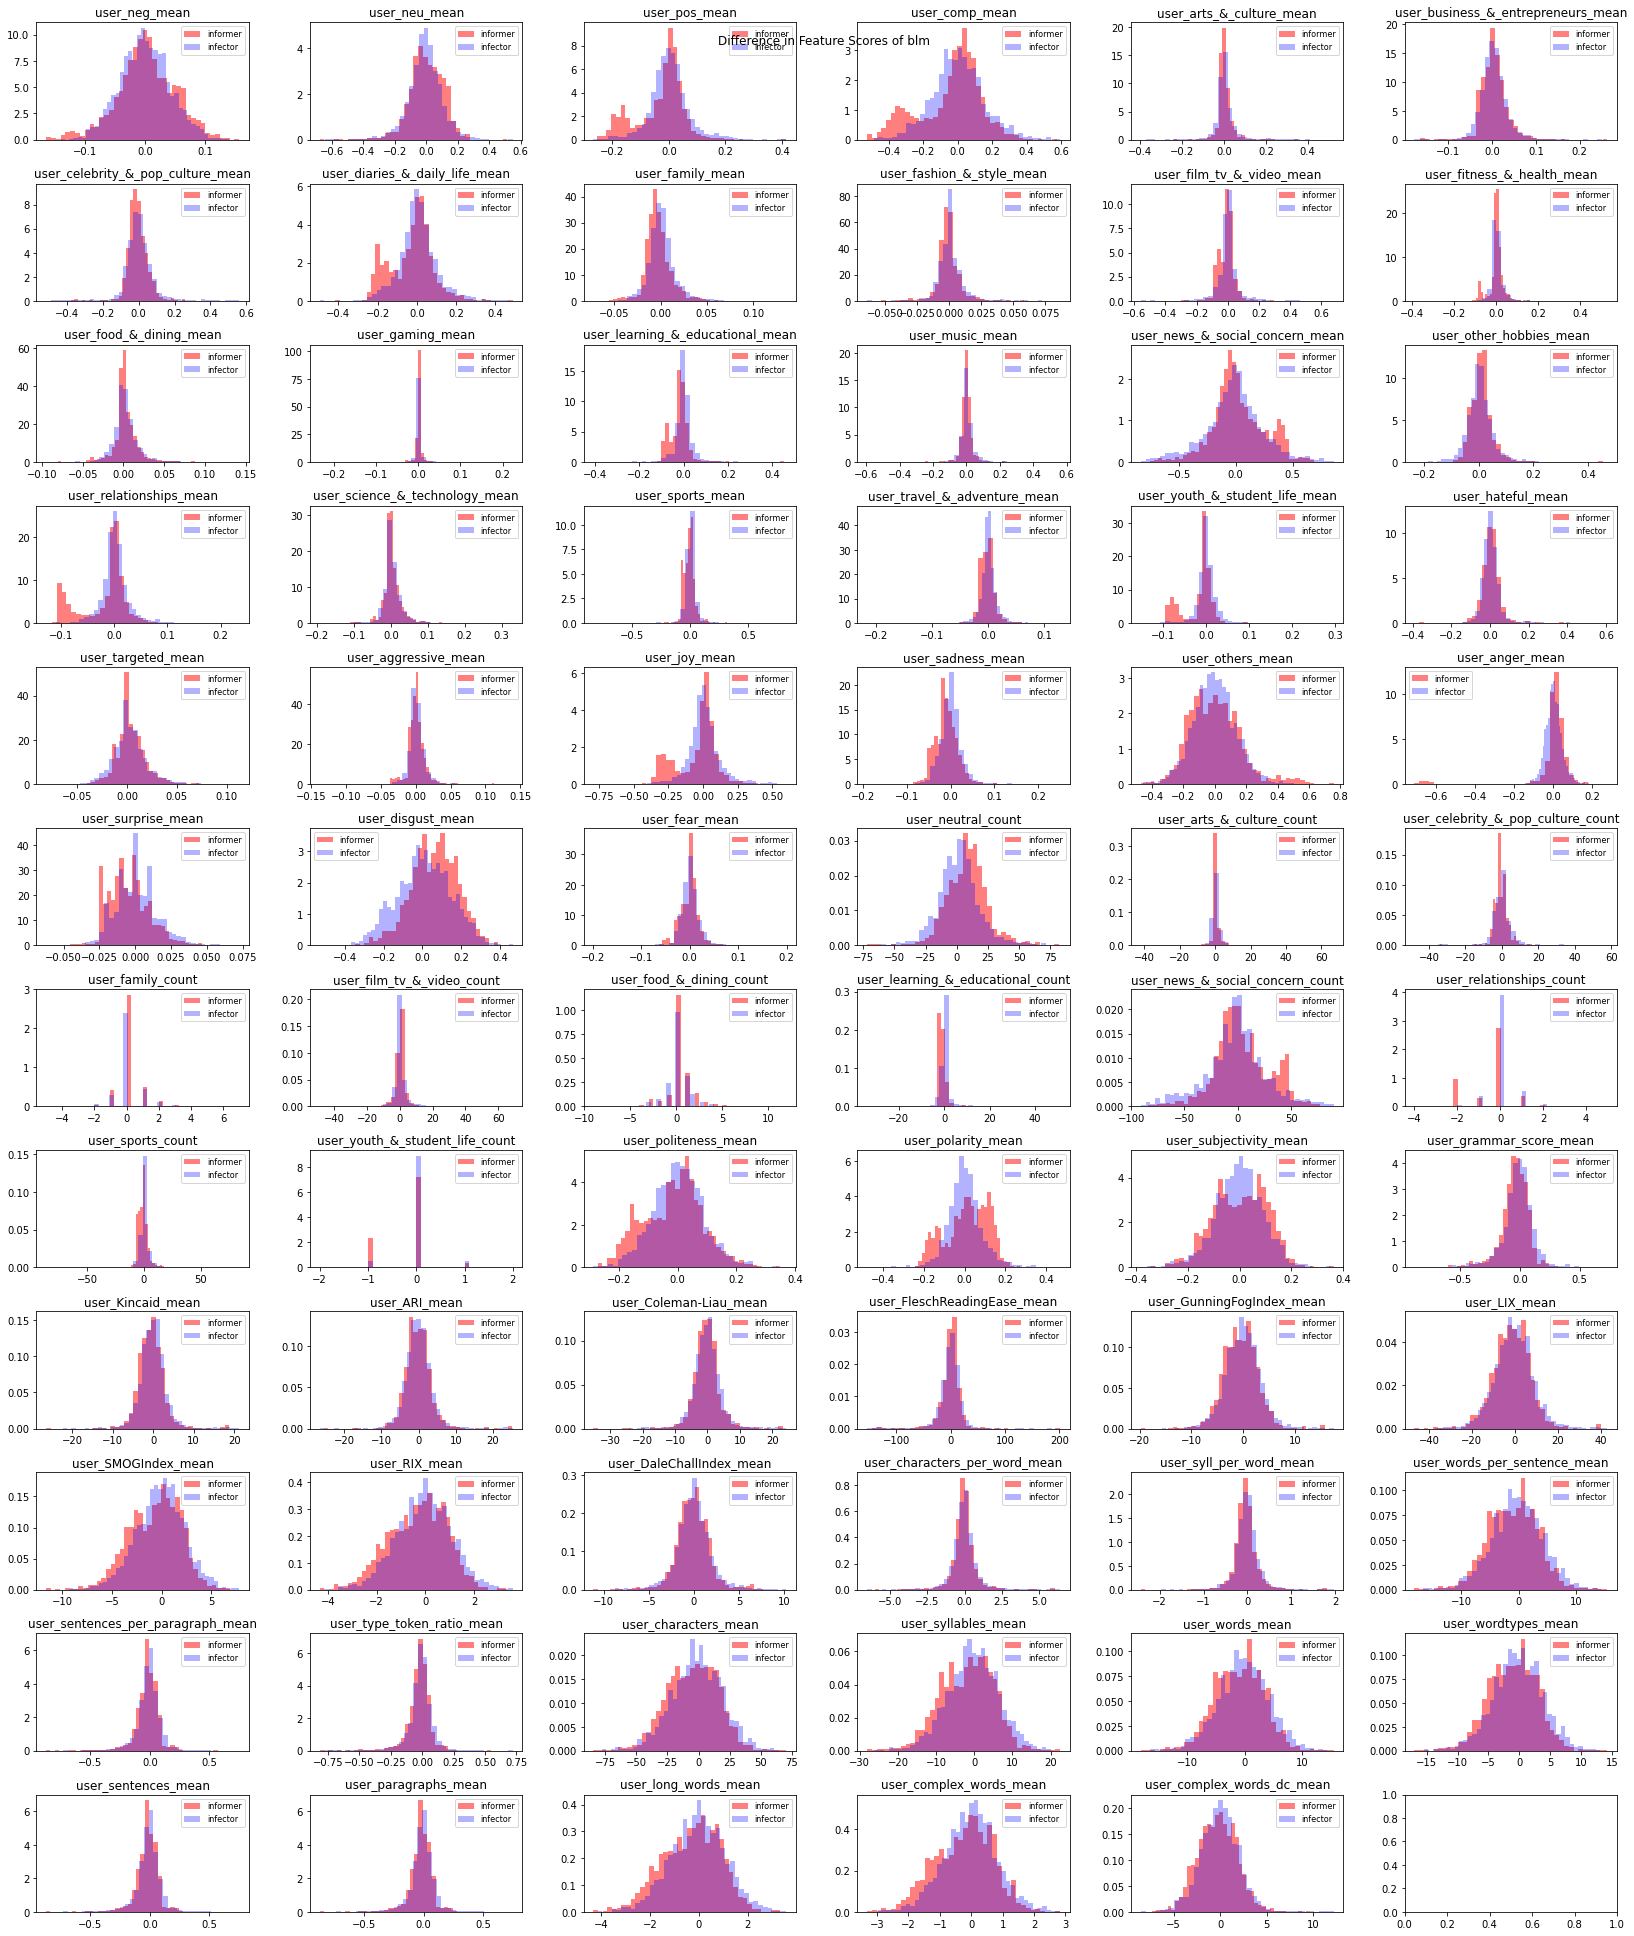

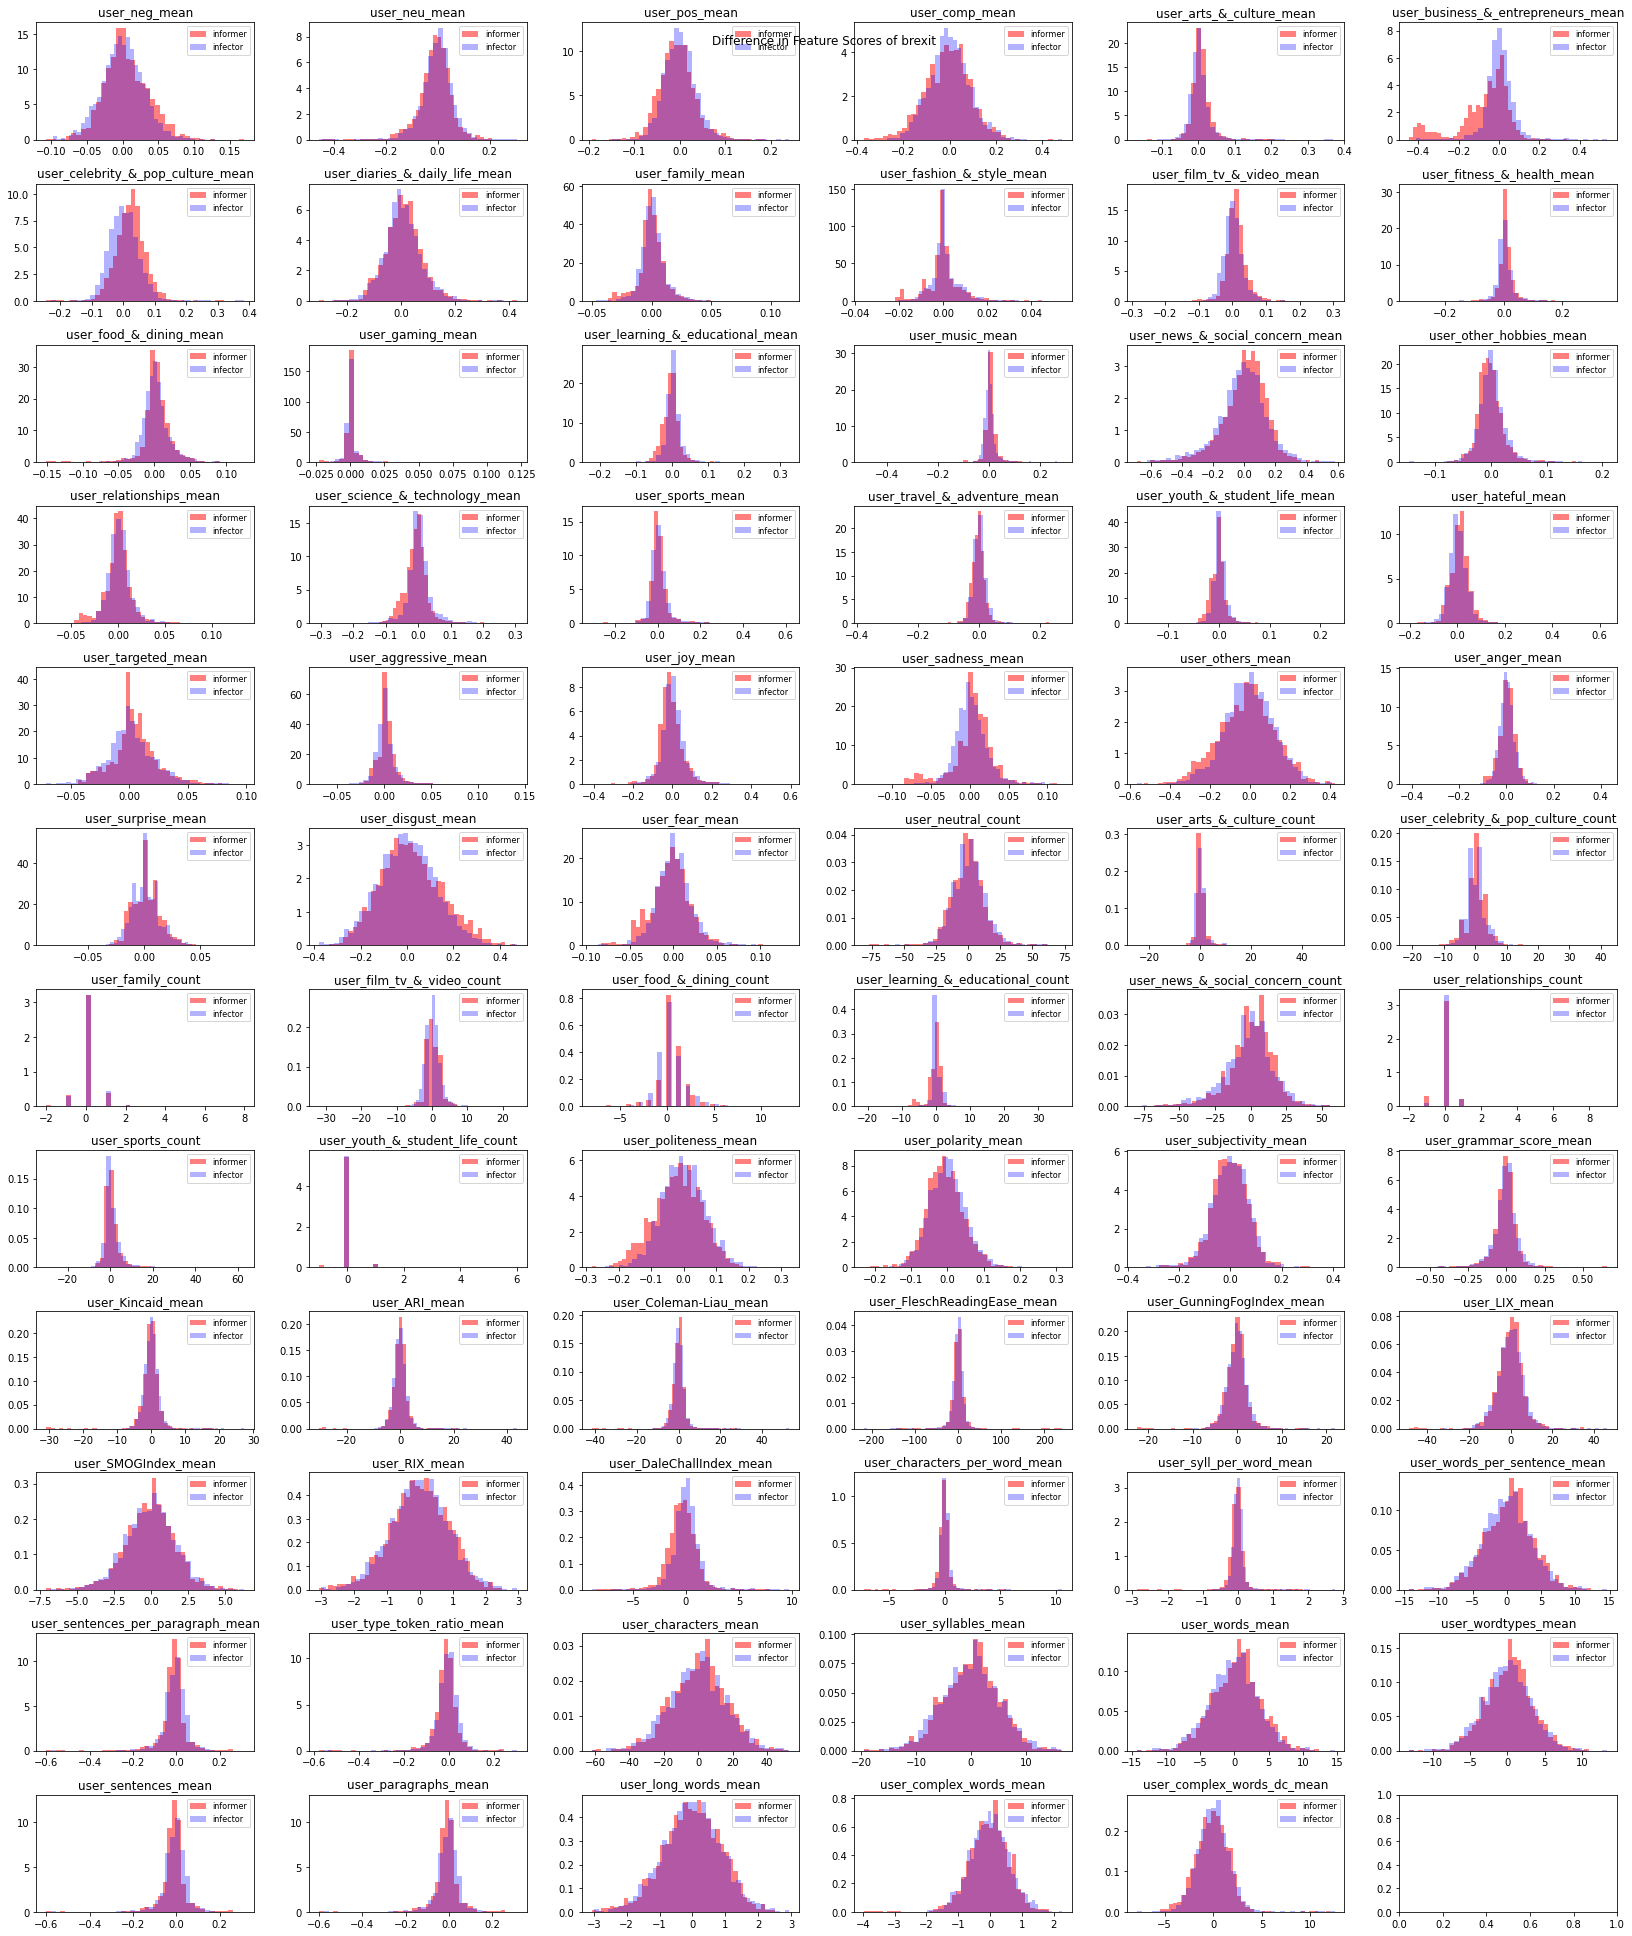

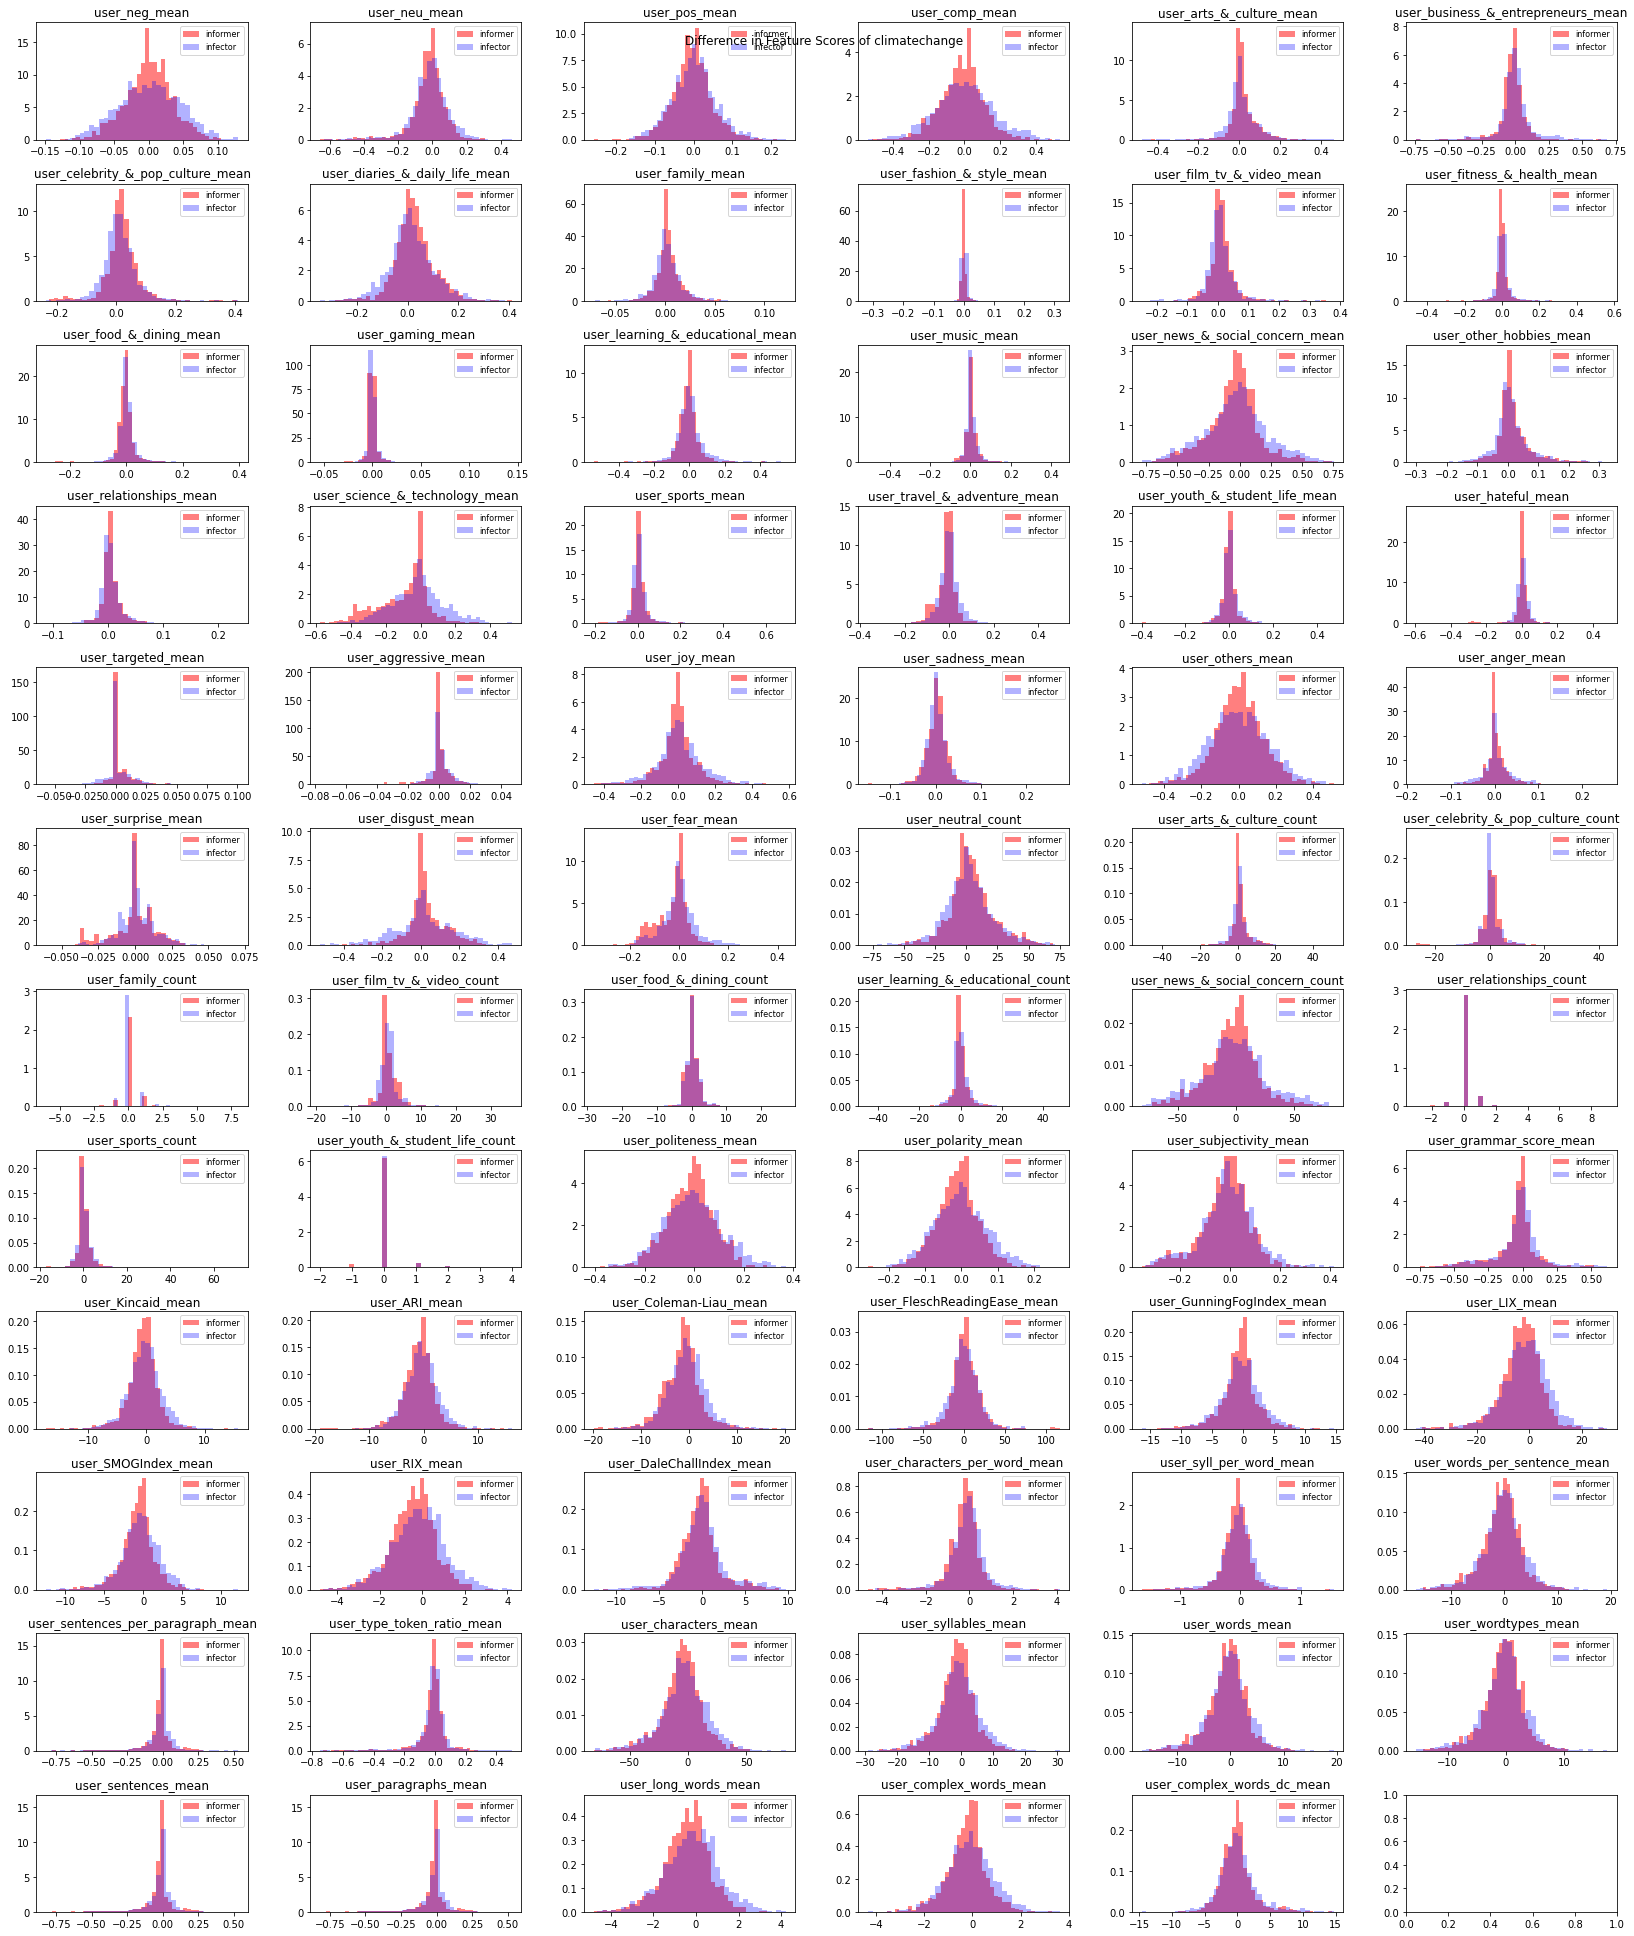

KeyboardInterrupt: ignored

In [ ]:
# HISTOGRAMS


import numpy as np
import matplotlib.pyplot as plt

hashtags = ['avengers','blm','brexit','climatechange','covid','gaza','loveisland','monkeypox','nhs','olivianewtonjohn','supercup','UkraineWar']

for hashtag in hashtags : 
    
    fig, axes = plt.subplots(12,6, figsize=(23, 27))

    fig.suptitle(f'Difference in Feature Scores of {hashtag}\n\n')

    data = all_udf[all_udf['hashtag']==hashtag]

    form = data[data['is-informer']==1]
    inf = data[data['is-infector']==1]
    targ = data[data['is-target']==1]


    ax = axes.ravel()                     # flatten the 2D array

    for i, col in enumerate(cols):                   # for each of the 30 features
        bins = 40
        #---plot histogram for each feature---
        fec_diff = targ[col].to_numpy() - inf[col].to_numpy()
        for_diff = targ[col].to_numpy() - form[col].to_numpy()
        
        ax[i].hist(fec_diff, bins=bins, color='r', alpha=.5, density=True)
        ax[i].hist(for_diff, bins=bins, color='b', alpha=0.3, density=True)
        #---set the title---
        ax[i].set_title(col, fontsize=12)    
        #---display the legend---
        ax[i].legend(['informer','infector'], loc='best', fontsize=8)
        
    plt.tight_layout()
    plt.show()

## table

In [ ]:
# TABLE 


import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial import distance

hashtags = ['avengers','blm','brexit','climatechange','covid','gaza','loveisland','monkeypox','nhs','olivianewtonjohn','supercup','UkraineWar']

sent = ['user_neg_mean', 'user_neu_mean', 'user_pos_mean']

topics = ['user_arts_&_culture_mean', 'user_business_&_entrepreneurs_mean', 'user_celebrity_&_pop_culture_mean', 'user_diaries_&_daily_life_mean', 'user_family_mean', 
'user_fashion_&_style_mean', 'user_film_tv_&_video_mean', 'user_fitness_&_health_mean', 'user_food_&_dining_mean', 'user_gaming_mean', 'user_learning_&_educational_mean', 
'user_music_mean', 'user_news_&_social_concern_mean', 'user_other_hobbies_mean', 'user_relationships_mean', 'user_science_&_technology_mean', 'user_sports_mean', 'user_travel_&_adventure_mean', 
'user_youth_&_student_life_mean']

hate = ['user_hateful_mean', 'user_targeted_mean', 'user_aggressive_mean']

emos = [ 'user_joy_mean', 'user_sadness_mean', 'user_others_mean', 'user_anger_mean', 'user_surprise_mean', 'user_disgust_mean', 'user_fear_mean', ]

reads = ['user_Kincaid_mean', 'user_ARI_mean', 'user_Coleman-Liau_mean', 'user_FleschReadingEase_mean', 'user_GunningFogIndex_mean', 'user_LIX_mean', 'user_SMOGIndex_mean', 'user_RIX_mean', 'user_DaleChallIndex_mean']

polite = ['user_politeness_mean']

polarity = ['user_polarity_mean']

grammar = ['user_grammar_score_mean']

all_types = [sent, topics, hate, emos]#, reads, polite, polarity, grammar, ['user_subjectivity_mean'] ]

for j,hashtag in enumerate(hashtags) : 

    data = all_udf[all_udf['hashtag']==hashtag]

    form = data[data['is-informer']==1]
    inf = data[data['is-infector']==1]
    targ = data[data['is-target']==1]

    row = []

    for i, col in enumerate(all_types):                   # for each of the 30 features

        if len(col) == 1: 
            fec_diff = targ[col].to_numpy() - inf[col].to_numpy()
            for_diff = targ[col].to_numpy() - form[col].to_numpy()
            
            if fec_diff.mean() > for_diff.mean():
                row.append( 'informer' )
            else: 
                row.append( 'infector' )
        else:
            n = len(form)
            fec_diff = np.array([ distance.euclidean(targ[col].iloc[i].to_numpy(),inf[col].iloc[i].to_numpy()) for i in range(n) ] )
            for_diff = np.array([ distance.euclidean(targ[col].iloc[i].to_numpy(), form[col].iloc[i].to_numpy()) for i in range(n) ] )
            
            if fec_diff.mean() > for_diff.mean():
                row.append( 'informer' )
            else: 
                row.append( 'infector' )


        
    df = pd.DataFrame(row).T
    df.columns = ['sentiment','topic','hatefullness','emotions']#,'readability','politeness','polarity','grammar','subjectivity']
    df.insert(0,column = 'hashtag', value= hashtag )

    if j==0:
        all_scores = df.copy()
    else:
        all_scores = pd.concat( [all_scores,df], axis=0)

# RUN

In [ ]:
# TABLE 


import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial import distance

hashtags = ['avengers','blm','brexit','climatechange','covid','gaza','loveisland','monkeypox','nhs','olivianewtonjohn','supercup','UkraineWar']

sent = ['user_neg_mean', 'user_neu_mean', 'user_pos_mean']

topics = ['user_arts_&_culture_mean', 'user_business_&_entrepreneurs_mean', 'user_celebrity_&_pop_culture_mean', 'user_diaries_&_daily_life_mean', 'user_family_mean', 
'user_fashion_&_style_mean', 'user_film_tv_&_video_mean', 'user_fitness_&_health_mean', 'user_food_&_dining_mean', 'user_gaming_mean', 'user_learning_&_educational_mean', 
'user_music_mean', 'user_news_&_social_concern_mean', 'user_other_hobbies_mean', 'user_relationships_mean', 'user_science_&_technology_mean', 'user_sports_mean', 'user_travel_&_adventure_mean', 
'user_youth_&_student_life_mean']

hate = ['user_hateful_mean', 'user_targeted_mean', 'user_aggressive_mean']

emos = [ 'user_joy_mean', 'user_sadness_mean', 'user_others_mean', 'user_anger_mean', 'user_surprise_mean', 'user_disgust_mean', 'user_fear_mean', ]

reads = ['user_Kincaid_mean', 'user_ARI_mean', 'user_Coleman-Liau_mean', 'user_FleschReadingEase_mean', 'user_GunningFogIndex_mean', 'user_LIX_mean', 'user_SMOGIndex_mean', 'user_RIX_mean', 'user_DaleChallIndex_mean']

polite = ['user_politeness_mean']

polarity = ['user_polarity_mean']

grammar = ['user_grammar_score_mean']

all_types = [sent, topics, hate, emos]#, reads, polite, polarity, grammar, ['user_subjectivity_mean'] ]

for j,hashtag in enumerate(hashtags) : 

    data = all_udf[all_udf['hashtag']==hashtag]

    form = data[data['is-informer']==1]
    inf = data[data['is-infector']==1]
    targ = data[data['is-target']==1]

    f_euc = []
    f_cos = []
    m_euc = []
    m_cos = []

    for i, col in enumerate(all_types):                   # for each of the 30 features

        if len(col) == 1: 
            fec_diff = targ[col].to_numpy() - inf[col].to_numpy()
            for_diff = targ[col].to_numpy() - form[col].to_numpy()
            
            if fec_diff.mean() > for_diff.mean():
                row.append( 'informer' )
            else: 
                row.append( 'infector' )
        else:
            n = len(form)
            f_euc. append( np.array([ distance.cosine(targ[col].iloc[i].to_numpy(),inf[col].iloc[i].to_numpy()) for i in range(n) ] ).mean() )
            f_cos. append( np.array([ distance.cosine(targ[col].iloc[i].to_numpy(), form[col].iloc[i].to_numpy()) for i in range(n) ] ).mean() )
            m_euc. append( np.array([ distance.euclidean(targ[col].iloc[i].to_numpy(),inf[col].iloc[i].to_numpy()) for i in range(n) ] ).mean() )
            m_cos. append( np.array([ distance.euclidean(targ[col].iloc[i].to_numpy(), form[col].iloc[i].to_numpy()) for i in range(n) ] ).mean() )



    
    e_df = pd.DataFrame([ ['infector'] + f_euc, ['informer'] + m_euc])
    e_df.columns = ['type','sentiment','topic','hatefullness','emotions']#,'readability','politeness','polarity','grammar','subjectivity']
    e_df.insert(0,column = 'hashtag', value= hashtag )

    c_df = pd.DataFrame([['infector'] + f_cos, ['informer']+m_cos])
    c_df.columns = ['type','sentiment','topic','hatefullness','emotions']#,'readability','politeness','polarity','grammar','subjectivity']
    c_df.insert(0,column = 'hashtag', value= hashtag )

    if j==0:
        all_euc_scores = e_df.copy()
        all_cos_scores = c_df.copy()
    else:
        all_euc_scores = pd.concat( [all_euc_scores, e_df], axis = 0)
        all_cos_scores = pd.concat( [all_cos_scores, c_df], axis = 0)
    
    print(f'added {hashtag} to consideration')

In [ ]:
all_euc_scores

,hashtag,type,sentiment,topic,hatefullness,emotions
0,avengers,infector,0.004516,0.098871,0.011052,0.030655
1,avengers,informer,0.094357,0.322342,0.012146,0.173443
0,blm,infector,0.012755,0.057996,0.007084,0.087953
1,blm,informer,0.124801,0.257199,0.039332,0.247257
0,brexit,infector,0.002616,0.035912,0.006367,0.041093
1,brexit,informer,0.066986,0.213728,0.036063,0.182019
0,climatechange,infector,0.003696,0.072658,0.007893,0.038324
1,climatechange,informer,0.090640,0.285137,0.025688,0.183883
0,covid,infector,0.003716,0.053406,0.008267,0.032157
1,covid,informer,0.094521,0.255514,0.021406,0.164038


In [ ]:
fig.savefig(f'multisource_analysis/feature_anal/user_scores_breakdown.png', bbox_inches='tight', pad_inches = 0, facecolor='w')

In [ ]:
df = all_udf[ all_udf['is-target']==0 ]

labels = df['is-infector']

# X = df.iloc[:,:-1]
X = df[cols]
# y = df.iloc[:,-1]
y = labels
# performing standardization
sc = StandardScaler()

X = X.copy()[ X[cols].notna() ]
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(axis=0,inplace=True)

X_scaled = sc.fit_transform(X)

In [ ]:
labels = all_udf['is-infector']

# X = df.iloc[:,:-1]
X = all_udf[cols]
# y = df.iloc[:,-1]
X['label'] = y

df_corr = X.corr()['label'].abs().sort_values(ascending=False)
print(df_corr.head(20))

C:\Users\berke\AppData\Local\Temp\ipykernel_27944\986115250.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['label'] = y


label                            1.000000
text_len                         0.505013
ARI                              0.479494
complex_words_dc                 0.453001
RIX                              0.438847
Kincaid                          0.435070
GunningFogIndex                  0.410231
complex_words                    0.405037
LIX                              0.391514
SMOGIndex                        0.356766
FleschReadingEase                0.268925
Coleman-Liau                     0.174739
user_syll_per_word_mean          0.160941
user_characters_per_word_mean    0.160824
user_fear_mean                   0.149163
DaleChallIndex                   0.145789
user_Coleman-Liau_mean           0.131977
user_LIX_mean                    0.129841
user_sadness_mean                0.120446
user_joy_mean                    0.118564
Name: label, dtype: float64


In [ ]:
from sklearn.linear_model import LinearRegression

def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        print(feature)
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})


data = all_udf[user_cols]
# data.dropna()
# data.dropna(axis=0)
# data.replace([np.inf, -np.inf], np.nan, inplace=True)
# data.dropna()
# data.dropna(axis=0)

calculate_vif(data,user_cols)

user_neg_mean
user_neu_mean
user_pos_mean
user_comp_mean
user_arts_&_culture_mean
user_business_&_entrepreneurs_mean
user_celebrity_&_pop_culture_mean
user_diaries_&_daily_life_mean
user_family_mean
user_fashion_&_style_mean
user_film_tv_&_video_mean
user_fitness_&_health_mean
user_food_&_dining_mean
user_gaming_mean
user_learning_&_educational_mean
user_music_mean
user_news_&_social_concern_mean
user_other_hobbies_mean
user_relationships_mean
user_science_&_technology_mean
user_sports_mean
user_travel_&_adventure_mean
user_youth_&_student_life_mean
user_hateful_mean
user_targeted_mean
user_aggressive_mean
user_joy_mean
user_sadness_mean
user_others_mean
user_anger_mean
user_surprise_mean
user_disgust_mean
user_fear_mean
user_negative_count
user_neutral_count
user_positive_count
user_arts_&_culture_count
user_business_&_entrepreneurs_count
user_celebrity_&_pop_culture_count
user_diaries_&_daily_life_count
user_family_count
user_fashion_&_style_count
user_film_tv_&_video_count
user_fitn

,VIF,Tolerance
user_neg_mean,9.265591,0.107926
user_neu_mean,2.390263,0.418364
user_pos_mean,7.542446,0.132583
user_comp_mean,15.034729,0.066513
user_arts_&_culture_mean,6.762151,0.147882
user_business_&_entrepreneurs_mean,5.875050,0.170211
user_celebrity_&_pop_culture_mean,19.402809,0.051539
user_diaries_&_daily_life_mean,11.747901,0.085122
user_family_mean,5.967919,0.167563
user_fashion_&_style_mean,13.297332,0.075203


## PCA

In [ ]:
# all_udf.to_csv('multisource_analysis/score_db/best_informer_user_breakdown.csv')
all_udf = pd.read_csv('multisource_analysis/score_db/ALL_BEST_FEATURES.csv')
cols = all_udf.columns.to_list()
[ cols.remove(x) for x in ['Unnamed: 0']]
[ cols.remove(x) for x in ['is-infector','is-informer','is-target', 'hashtag']]
cols = [ x for x in cols if 'count' not in x]

In [ ]:
print(cols)

['polarity', 'subjectivity', 'text_len', 'politeness', 'neg', 'neu', 'pos', 'compound', 'grammar-word-score', 'grammar-sentence-score', 'Kincaid', 'ARI', 'Coleman-Liau', 'FleschReadingEase', 'GunningFogIndex', 'LIX', 'SMOGIndex', 'RIX', 'DaleChallIndex', 'complex_words', 'complex_words_dc', 'arts_&_culture', 'business_&_entrepreneurs', 'celebrity_&_pop_culture', 'diaries_&_daily_life', 'family', 'fashion_&_style', 'film_tv_&_video', 'fitness_&_health', 'food_&_dining', 'gaming', 'learning_&_educational', 'music', 'news_&_social_concern', 'other_hobbies', 'relationships', 'science_&_technology', 'sports', 'travel_&_adventure', 'youth_&_student_life', 'pop_culture', 'daily_life', 'sports_&_gaming', 'joy', 'sadness', 'others', 'anger', 'surprise', 'disgust', 'hateful', 'targeted', 'aggressive', 'num_male', 'num_female', 'fear', 'user_neg_mean', 'user_neu_mean', 'user_pos_mean', 'user_comp_mean', 'user_arts_&_culture_mean', 'user_business_&_entrepreneurs_mean', 'user_celebrity_&_pop_cultur

In [ ]:
from sklearn.preprocessing import StandardScaler
# get the features and label from the original dataframe

df = all_udf[ all_udf['is-target']==0 ]

labels = df['is-infector']

# X = df.iloc[:,:-1]
X = df[cols]
# y = df.iloc[:,-1]
y = labels
# performing standardization
sc = StandardScaler()

X = X.copy()[ X[cols].notna() ]
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(axis=0,inplace=True)

X_scaled = sc.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA

components = None
pca = PCA(n_components = components)
# perform PCA on the scaled data
pca.fit(X_scaled)

PCA()

In [ ]:
# print the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[1.59911395e+01 8.91731937e+00 8.13386593e+00 6.73192698e+00
 4.68424280e+00 4.15413869e+00 3.03952674e+00 2.66227632e+00
 2.29928623e+00 2.15864831e+00 1.85664028e+00 1.84276724e+00
 1.75238062e+00 1.64811761e+00 1.51889725e+00 1.41902247e+00
 1.34694411e+00 1.29614709e+00 1.24529072e+00 1.12400715e+00
 1.07199217e+00 1.02670293e+00 9.96769543e-01 9.75636350e-01
 8.88637696e-01 8.72004205e-01 8.08837867e-01 7.82439003e-01
 7.68046864e-01 7.32020739e-01 7.13309064e-01 7.01648473e-01
 6.62531283e-01 6.48598289e-01 6.21604295e-01 6.18469747e-01
 5.89111765e-01 5.75499633e-01 5.53923422e-01 5.32822033e-01
 5.26590386e-01 4.88179515e-01 4.74993027e-01 4.54694441e-01
 4.40260239e-01 4.31235352e-01 4.12840358e-01 3.85173847e-01
 3.68741256e-01 3.50567401e-01 3.30962233e-01 3.26287223e-01
 3.01545668e-01 2.87484310e-01 2.66746737e-01 2.59674881e-01
 2.54261092e-01 2.52129212e-01 2.46529130e-01 2.34879602e-01
 2.19073157e-01 2.14755642e-01 1.99394319e-01 1.95705490e-01


In [ ]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[ 15.99113949  24.90845886  33.04232479  39.77425177  44.45849457
  48.61263326  51.65216     54.31443631  56.61372255  58.77237085
  60.62901113  62.47177837  64.22415899  65.8722766   67.39117384
  68.81019632  70.15714042  71.45328752  72.69857824  73.82258538
  74.89457755  75.92128048  76.91805002  77.89368637  78.78232407
  79.65432827  80.46316614  81.24560514  82.01365201  82.74567275
  83.45898181  84.16063028  84.82316157  85.47175986  86.09336415
  86.7118339   87.30094566  87.87644529  88.43036872  88.96319075
  89.48978114  89.97796065  90.45295368  90.90764812  91.34790836
  91.77914371  92.19198407  92.57715791  92.94589917  93.29646657
  93.6274288   93.95371603  94.2552617   94.54274601  94.80949274
  95.06916762  95.32342872  95.57555793  95.82208706  96.05696666
  96.27603982  96.49079546  96.69018978  96.88589527  97.07517933
  97.25487914  97.4210037   97.57649305  97.72699082  97.87447507
  98.01334901  98.14073049  98.25893336  

Text(0.5, 1.0, 'PCA of Tweet and User-based Features')

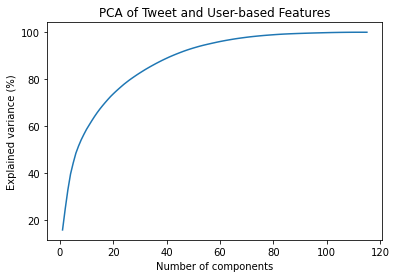

In [ ]:
# plot a scree plot
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")
plt.title('PCA of Tweet and User-based Features')

Cumulative Variances (Percentage):
[15.99113949 24.90845886 33.04232479 39.77425177 44.45849457 48.61263326
 51.65216    54.31443631 56.61372255 58.77237085 60.62901113 62.47177837
 64.22415899 65.8722766  67.39117384 68.81019632 70.15714042 71.45328752
 72.69857824 73.82258538 74.89457755 75.92128048 76.91805002 77.89368637
 78.78232407 79.65432827 80.46316614 81.24560514 82.01365201 82.74567275
 83.45898181 84.16063028 84.82316157 85.47175986]
Number of components: 34


Text(0, 0.5, 'Explained variance (%)')

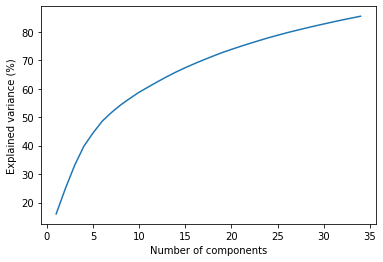

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.85)
pca.fit(X_scaled)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [ ]:
pca_components = abs(pca.components_)
print(pca_components)

[[0.04368069 0.0079887  0.10810508 ... 0.21082751 0.19781779 0.1697549 ]
 [0.0669035  0.00522966 0.03488    ... 0.0498801  0.07712319 0.07525504]
 [0.06011127 0.09827642 0.2014845  ... 0.01960516 0.02741878 0.06627172]
 ...
 [0.13372923 0.22290047 0.04349253 ... 0.02214469 0.04934622 0.09241223]
 [0.13925744 0.13396507 0.01451612 ... 0.00735888 0.01060634 0.01849041]
 [0.27060998 0.37294421 0.09972154 ... 0.01993374 0.01037639 0.04738688]]


In [ ]:
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
    print(f'Component {row}: {X.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['user_syllables_mean', 'user_characters_mean', 'user_long_words_mean', 'user_RIX_mean']
Component 1: ['user_DaleChallIndex_mean', 'user_syll_per_word_mean', 'user_characters_per_word_mean', 'user_Coleman-Liau_mean']
Component 2: ['Kincaid', 'ARI', 'GunningFogIndex', 'complex_words']
Component 3: ['user_comp_mean', 'user_subjectivity_mean', 'user_polarity_mean', 'user_pos_mean']
Component 4: ['pop_culture', 'science_&_technology', 'user_celebrity_&_pop_culture_mean', 'celebrity_&_pop_culture']
Component 5: ['user_FleschReadingEase_mean', 'user_type_token_ratio_mean', 'user_arts_&_culture_mean', 'user_sentences_per_paragraph_mean']
Component 6: ['user_film_tv_&_video_mean', 'film_tv_&_video', 'pos', 'polarity']
Component 7: ['neu', 'business_&_entrepreneurs', 'family', 'relationships']
Component 8: ['others', 'hateful', 'aggressive', 'surprise']
Component 9: ['compound', 'subjectivity', 'business_&_entrepreneurs', 'pos']
Compo